#### Pass Task 4

In [1]:
# pip install --upgrade "protobuf<=3.20.1"

In [2]:
from scikeras.wrappers import KerasClassifier

In [3]:
# pip install scikeras

In [4]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import fetch_openml
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##### 1. Create an MLP model with 16 hidden layers using "mnist_784" dataset from sklearn and improve the result using hyperparameter tuning

In [5]:
from sklearn import datasets

In [6]:
from sklearn.datasets import fetch_openml

In [7]:
# from sklearn.datasets import fetch_openml.mnist_784
mnist = fetch_openml('mnist_784')

# Creating features and target dataset
X = mnist.data
y = mnist.target

In [8]:
# CHecking the few rows of the data
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
from keras.utils import to_categorical

In [12]:
# Converting target y column into one hot encoding values
y_cat = to_categorical(y)

In [13]:
y_cat[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
print(f"Number of image records:{X.shape[0]}")
print(f"Number of feature pixels in an image:{X.shape[1]}")

Number of image records:70000
Number of feature pixels in an image:784


In [15]:
scaler = StandardScaler()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.33, random_state=42)

In [17]:
print(f"shape of training images:{X_train.shape}")
print(f"shape of target training images:{y_train.shape}\n")

print(f"shape of testing images:{X_test.shape}")
print(f"shape of target testing images:{y_test.shape}")

shape of training images:(46900, 784)
shape of target training images:(46900, 10)

shape of testing images:(23100, 784)
shape of target testing images:(23100, 10)


In [18]:
# Standardising the features pixel values
# scaled_train = scaler.fit_transform(X_train)
# scaled_test = scaler.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here we will be creating models with different architecture and run them one by one and after that we will be using GridsearchCV to make solution more robust and generalized

In [19]:
# Defining the model architecture
model = Sequential()

# first hidden layer
model.add(Dense(units = 2,activation='tanh',input_shape=(784,)))

# second hidden layer
model.add(Dense(units = 2,activation='tanh',))

# third hidden layer
model.add(Dense(units = 2,activation='tanh',))

# fourth hidden layer
model.add(Dense(units = 2,activation='tanh',))

# Fifth hidden layer
model.add(Dense(units = 2,activation='tanh',))

# sixth hidden layer
model.add(Dense(units = 2,activation='tanh',))

# seventh hidden layer
model.add(Dense(units = 2,activation='tanh',))

# eighth layer
model.add(Dense(units = 2,activation='tanh',))

# nineth hidden layer
model.add(Dense(units = 2,activation='tanh',))

# tenth hidden layer 
model.add(Dense(units = 2,activation='tanh',))

# 11th hidden layer
model.add(Dense(units = 2,activation='tanh',))

# 12th hidden layer
model.add(Dense(units = 2,activation='tanh',))

# 13th hidden layer
model.add(Dense(units = 2,activation='tanh',))

# 14th hidden layer
model.add(Dense(units = 2,activation='tanh',))

# 15th hidden layer
model.add(Dense(units = 2,activation = 'tanh'))

# 16th hidden layer
model.add(Dense(units = 2,activation = 'tanh'))

# output layer
model.add(Dense(10,activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy',metrics = 'accuracy',optimizer = 'rmsprop')

# Fitting the model, training with epochs = 10
model.fit(X_train,y_train,epochs = 10,validation_data=(X_test,y_test))


Epoch 1/10
1466/1466 [==============================] - 7s 3ms/step - loss: 1.9936 - accuracy: 0.2000 - val_loss: 1.9131 - val_accuracy: 0.2059
Epoch 2/10
1466/1466 [==============================] - 5s 3ms/step - loss: 1.8738 - accuracy: 0.2322 - val_loss: 1.8282 - val_accuracy: 0.2766
Epoch 3/10
1466/1466 [==============================] - 5s 3ms/step - loss: 1.7844 - accuracy: 0.2785 - val_loss: 1.7610 - val_accuracy: 0.2882
Epoch 4/10
1466/1466 [==============================] - 4s 3ms/step - loss: 1.7259 - accuracy: 0.2920 - val_loss: 1.6872 - val_accuracy: 0.2948
Epoch 5/10
1466/1466 [==============================] - 5s 3ms/step - loss: 1.6476 - accuracy: 0.2966 - val_loss: 1.6270 - val_accuracy: 0.3027
Epoch 6/10
1466/1466 [==============================] - 4s 3ms/step - loss: 1.6187 - accuracy: 0.3013 - val_loss: 1.6200 - val_accuracy: 0.2959
Epoch 7/10
1466/1466 [==============================] - 4s 3ms/step - loss: 1.6071 - accuracy: 0.3019 - val_loss: 1.6138 - val_accuracy:

<Axes: >

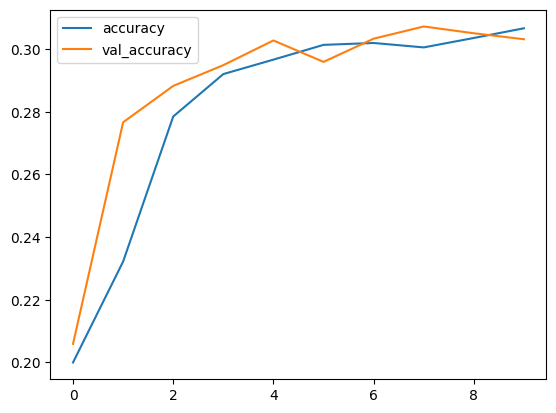

In [20]:
result_1 = pd.DataFrame(model.history.history)
result_1[['accuracy','val_accuracy']].plot()

In [21]:
model_2 = Sequential()

x = 16
# first hidden layer
model_2.add(Dense(units = x,activation='tanh',input_shape=(784,)))

# second hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# third hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# fourth hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# Fifth hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# sixth hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# seventh hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# eighth layer
model_2.add(Dense(units = x,activation='tanh',))

# nineth hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# tenth hidden layer 
model_2.add(Dense(units = x,activation='tanh',))

# 11th hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# 12th hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# 13th hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# 14th hidden layer
model_2.add(Dense(units = x,activation='tanh',))

# 15th hidden layer
model_2.add(Dense(units = x,activation = 'tanh'))

# 16th hidden layer
model_2.add(Dense(units = x,activation = 'tanh'))

# output layer
model_2.add(Dense(10,activation = 'softmax'))

model_2.compile(loss = 'categorical_crossentropy',metrics = 'accuracy',optimizer = 'rmsprop')

# Fitting the model, training with epochs = 50
model_2.fit(X_train,y_train,epochs = 20,validation_data=(X_test,y_test))


Epoch 1/20
1466/1466 [==============================] - 7s 3ms/step - loss: 0.7569 - accuracy: 0.7892 - val_loss: 0.5398 - val_accuracy: 0.8600
Epoch 2/20
1466/1466 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8859 - val_loss: 0.4336 - val_accuracy: 0.8897
Epoch 3/20
1466/1466 [==============================] - 5s 3ms/step - loss: 0.3755 - accuracy: 0.9051 - val_loss: 0.3940 - val_accuracy: 0.8985
Epoch 4/20
1466/1466 [==============================] - 5s 3ms/step - loss: 0.3343 - accuracy: 0.9155 - val_loss: 0.3850 - val_accuracy: 0.9027
Epoch 5/20
1466/1466 [==============================] - 4s 3ms/step - loss: 0.3110 - accuracy: 0.9222 - val_loss: 0.3516 - val_accuracy: 0.9102
Epoch 6/20
1466/1466 [==============================] - 4s 3ms/step - loss: 0.2897 - accuracy: 0.9273 - val_loss: 0.3456 - val_accuracy: 0.9128
Epoch 7/20
1466/1466 [==============================] - 4s 3ms/step - loss: 0.2729 - accuracy: 0.9319 - val_loss: 0.3555 - val_accuracy:

<Axes: >

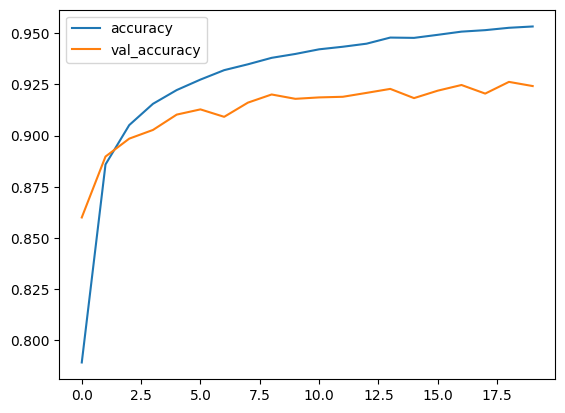

In [22]:
result_2 = pd.DataFrame(model_2.history.history)
result_2[['accuracy','val_accuracy']].plot()

In [23]:
model_3 = Sequential()

x = 16
# first hidden layer
model_3.add(Dense(units = x,activation='relu',input_shape=(784,)))

# second hidden layer
model_3.add(Dense(units = x,activation='relu',))

# third hidden layer
model_3.add(Dense(units = x,activation='relu',))

# fourth hidden layer
model_3.add(Dense(units = x,activation='relu',))

# Fifth hidden layer
model_3.add(Dense(units = x,activation='relu',))

# sixth hidden layer
model_3.add(Dense(units = x,activation='relu',))

# seventh hidden layer
model_3.add(Dense(units = x,activation='relu',))

# eighth layer
model_3.add(Dense(units = x,activation='relu',))

# nineth hidden layer
model_3.add(Dense(units = x,activation='relu',))

# tenth hidden layer 
model_3.add(Dense(units = x,activation='relu',))

# 11th hidden layer
model_3.add(Dense(units = x,activation='relu',))

# 12th hidden layer
model_3.add(Dense(units = x,activation='relu',))

# 13th hidden layer
model_3.add(Dense(units = x,activation='relu',))

# 14th hidden layer
model_3.add(Dense(units = x,activation='relu',))

# 15th hidden layer
model_3.add(Dense(units = x,activation = 'relu'))

# 16th hidden layer
model_3.add(Dense(units = x,activation = 'relu'))

# output layer
model_3.add(Dense(10,activation = 'softmax'))

model_3.compile(loss = 'categorical_crossentropy',metrics = 'accuracy',optimizer = 'rmsprop')

# Fitting the model, training with epochs = 50
model_3.fit(X_train,y_train,epochs = 20,validation_data=(X_test,y_test))


Epoch 1/20
1466/1466 [==============================] - 7s 4ms/step - loss: 1.2009 - accuracy: 0.5668 - val_loss: 0.7780 - val_accuracy: 0.7638
Epoch 2/20
1466/1466 [==============================] - 6s 4ms/step - loss: 0.5729 - accuracy: 0.8363 - val_loss: 0.4897 - val_accuracy: 0.8653
Epoch 3/20
1466/1466 [==============================] - 6s 4ms/step - loss: 0.4305 - accuracy: 0.8797 - val_loss: 0.4266 - val_accuracy: 0.8817
Epoch 4/20
1466/1466 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.9035 - val_loss: 0.3742 - val_accuracy: 0.9031
Epoch 5/20
1466/1466 [==============================] - 5s 3ms/step - loss: 0.3230 - accuracy: 0.9155 - val_loss: 0.3378 - val_accuracy: 0.9127
Epoch 6/20
1466/1466 [==============================] - 4s 3ms/step - loss: 0.2982 - accuracy: 0.9217 - val_loss: 0.3209 - val_accuracy: 0.9181
Epoch 7/20
1466/1466 [==============================] - 4s 3ms/step - loss: 0.2774 - accuracy: 0.9286 - val_loss: 0.3539 - val_accuracy:

<Axes: >

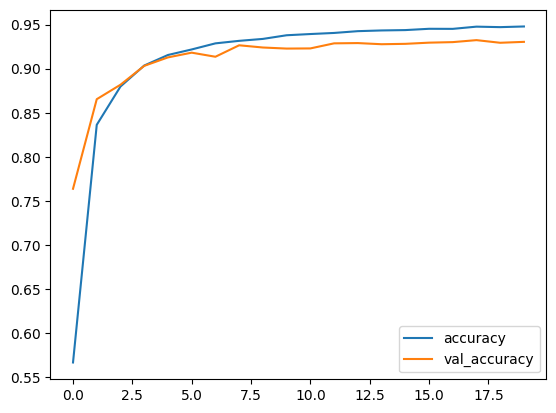

In [24]:
result_3 = pd.DataFrame(model_3.history.history)
result_3[['accuracy','val_accuracy']].plot()

In [25]:
model_4 = Sequential()

x = 16
# first hidden layer
model_4.add(Dense(units = x,activation='relu',input_shape=(784,)))

# second hidden layer
model_4.add(Dense(units = x,activation='relu',))

# third hidden layer
model_4.add(Dense(units = x,activation='relu',))

# fourth hidden layer
model_4.add(Dense(units = x,activation='relu',))

# Fifth hidden layer
model_4.add(Dense(units = x,activation='relu',))

# sixth hidden layer
model_4.add(Dense(units = x,activation='relu',))

# seventh hidden layer
model_4.add(Dense(units = x,activation='relu',))

# eighth layer
model_4.add(Dense(units = x,activation='relu',))

# nineth hidden layer
model_4.add(Dense(units = x,activation='relu',))

# tenth hidden layer 
model_4.add(Dense(units = x,activation='relu',))

# 11th hidden layer
model_4.add(Dense(units = x,activation='relu',))

# 12th hidden layer
model_4.add(Dense(units = x,activation='relu',))

# 13th hidden layer
model_4.add(Dense(units = x,activation='relu',))

# 14th hidden layer
model_4.add(Dense(units = x,activation='relu',))

# 15th hidden layer
model_4.add(Dense(units = x,activation = 'relu'))

# 16th hidden layer
model_4.add(Dense(units = x,activation = 'relu'))

# output layer
model_4.add(Dense(10,activation = 'softmax'))

model_4.compile(loss = 'categorical_crossentropy',metrics = 'accuracy',optimizer = 'adam')

# Fitting the model, training with epochs = 50
model_4.fit(X_train,y_train,epochs = 30,validation_data=(X_test,y_test))


Epoch 1/30
1466/1466 [==============================] - 8s 4ms/step - loss: 0.9667 - accuracy: 0.6557 - val_loss: 0.5950 - val_accuracy: 0.8212
Epoch 2/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.4815 - accuracy: 0.8556 - val_loss: 0.4455 - val_accuracy: 0.8753
Epoch 3/30
1466/1466 [==============================] - 4s 3ms/step - loss: 0.3865 - accuracy: 0.8888 - val_loss: 0.3845 - val_accuracy: 0.8918
Epoch 4/30
1466/1466 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.9034 - val_loss: 0.3536 - val_accuracy: 0.9035
Epoch 5/30
1466/1466 [==============================] - 4s 3ms/step - loss: 0.3093 - accuracy: 0.9139 - val_loss: 0.3496 - val_accuracy: 0.9055
Epoch 6/30
1466/1466 [==============================] - 5s 3ms/step - loss: 0.2871 - accuracy: 0.9220 - val_loss: 0.3304 - val_accuracy: 0.9117
Epoch 7/30
1466/1466 [==============================] - 5s 3ms/step - loss: 0.2720 - accuracy: 0.9270 - val_loss: 0.3491 - val_accuracy:

<Axes: >

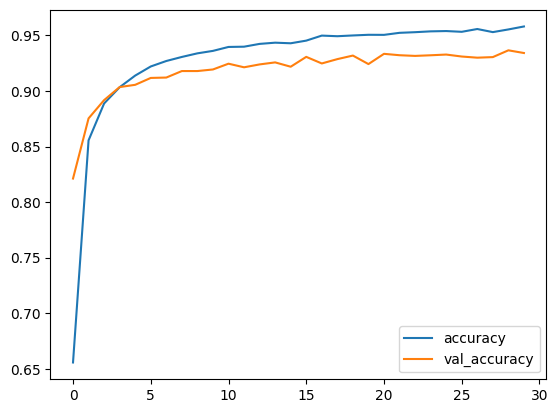

In [26]:
result_4 = pd.DataFrame(model_4.history.history)
result_4[['accuracy','val_accuracy']].plot()

In [27]:
model_5 = Sequential()

x = 32
# first hidden layer
model_5.add(Dense(units = x,activation='relu',input_shape=(784,)))

# second hidden layer
model_5.add(Dense(units = x,activation='relu',))

# third hidden layer
model_5.add(Dense(units = x,activation='relu',))

# fourth hidden layer
model_5.add(Dense(units = x,activation='relu',))

# Fifth hidden layer
model_5.add(Dense(units = x,activation='relu',))

# sixth hidden layer
model_5.add(Dense(units = x,activation='relu',))

# seventh hidden layer
model_5.add(Dense(units = x,activation='relu',))

# eighth layer
model_5.add(Dense(units = x,activation='relu',))

# nineth hidden layer
model_5.add(Dense(units = x,activation='relu',))

# tenth hidden layer 
model_5.add(Dense(units = x,activation='relu',))

# 11th hidden layer
model_5.add(Dense(units = x,activation='relu',))

# 12th hidden layer
model_5.add(Dense(units = x,activation='relu',))

# 13th hidden layer
model_5.add(Dense(units = x,activation='relu',))

# 14th hidden layer
model_5.add(Dense(units = x,activation='relu',))

# 15th hidden layer
model_5.add(Dense(units = x,activation = 'relu'))

# 16th hidden layer
model_5.add(Dense(units = x,activation = 'relu'))

# output layer
model_5.add(Dense(10,activation = 'softmax'))

model_5.compile(loss = 'categorical_crossentropy',metrics = 'accuracy',optimizer = 'adam')

# Fitting the model, training with epochs = 50
model_5.fit(X_train,y_train,epochs = 30,validation_data=(X_test,y_test))


Epoch 1/30
1466/1466 [==============================] - 8s 4ms/step - loss: 0.7868 - accuracy: 0.7379 - val_loss: 0.3447 - val_accuracy: 0.9071
Epoch 2/30
1466/1466 [==============================] - 5s 4ms/step - loss: 0.2808 - accuracy: 0.9242 - val_loss: 0.2981 - val_accuracy: 0.9291
Epoch 3/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.2199 - accuracy: 0.9413 - val_loss: 0.2350 - val_accuracy: 0.9399
Epoch 4/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.1913 - accuracy: 0.9509 - val_loss: 0.2251 - val_accuracy: 0.9415
Epoch 5/30
1466/1466 [==============================] - 5s 4ms/step - loss: 0.1674 - accuracy: 0.9564 - val_loss: 0.2231 - val_accuracy: 0.9452
Epoch 6/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.1505 - accuracy: 0.9601 - val_loss: 0.2092 - val_accuracy: 0.9495
Epoch 7/30
1466/1466 [==============================] - 5s 4ms/step - loss: 0.1375 - accuracy: 0.9645 - val_loss: 0.2115 - val_accuracy:

<Axes: >

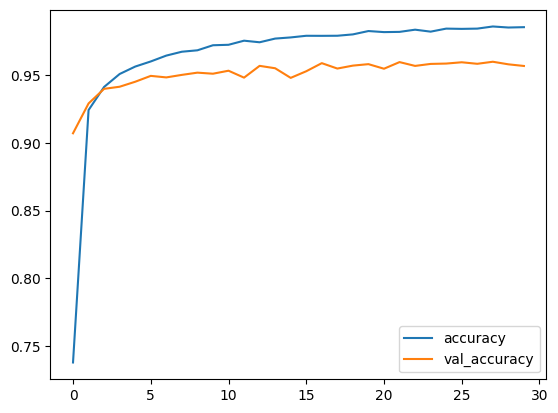

In [28]:
result_5 = pd.DataFrame(model_5.history.history)
result_5[['accuracy','val_accuracy']].plot()

In [29]:
model_6 = Sequential()

x = 32
# first hidden layer
model_6.add(Dense(units = x,activation='relu',input_shape=(784,)))

# second hidden layer
model_6.add(Dense(units = x,activation='relu',))

# third hidden layer
model_6.add(Dense(units = x,activation='relu',))

# fourth hidden layer
model_6.add(Dense(units = x,activation='relu',))
model_6.add(Dropout(0.2))
# Fifth hidden layer
model_6.add(Dense(units = x,activation='relu',))

# sixth hidden layer
model_6.add(Dense(units = x,activation='relu',))
model_6.add(Dropout(0.2))
# seventh hidden layer
model_6.add(Dense(units = x,activation='relu',))

# eighth layer
model_6.add(Dense(units = x,activation='relu',))
model_6.add(Dropout(0.2))
# nineth hidden layer
model_6.add(Dense(units = x,activation='relu',))

# tenth hidden layer 
model_6.add(Dense(units = x,activation='relu',))
model_6.add(Dropout(0.2))
# 11th hidden layer
model_6.add(Dense(units = x,activation='relu',))

# 12th hidden layer
model_6.add(Dense(units = x,activation='relu',))

# 13th hidden layer
model_6.add(Dense(units = x,activation='relu',))
model_6.add(Dropout(0.2))
# 14th hidden layer
model_6.add(Dense(units = x,activation='relu',))

# 15th hidden layer
model_6.add(Dense(units = x,activation = 'relu'))

# 16th hidden layer
model_6.add(Dense(units = x,activation = 'relu'))

# output layer
model_6.add(Dense(10,activation = 'softmax'))

model_6.compile(loss = 'categorical_crossentropy',metrics = 'accuracy',optimizer = 'adam')

# Fitting the model, training with epochs = 50
model_6.fit(X_train,y_train,epochs = 30,validation_data=(X_test,y_test))


Epoch 1/30
1466/1466 [==============================] - 9s 5ms/step - loss: 1.3471 - accuracy: 0.4491 - val_loss: 0.9252 - val_accuracy: 0.6329
Epoch 2/30
1466/1466 [==============================] - 7s 4ms/step - loss: 0.7349 - accuracy: 0.7647 - val_loss: 0.6030 - val_accuracy: 0.8334
Epoch 3/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.5118 - accuracy: 0.8646 - val_loss: 0.8244 - val_accuracy: 0.6972
Epoch 4/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.4096 - accuracy: 0.8979 - val_loss: 0.6416 - val_accuracy: 0.7671
Epoch 5/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.3832 - accuracy: 0.9015 - val_loss: 0.4200 - val_accuracy: 0.8855
Epoch 6/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.3500 - accuracy: 0.9156 - val_loss: 0.3810 - val_accuracy: 0.9065
Epoch 7/30
1466/1466 [==============================] - 6s 4ms/step - loss: 0.3108 - accuracy: 0.9268 - val_loss: 0.3627 - val_accuracy:

<Axes: >

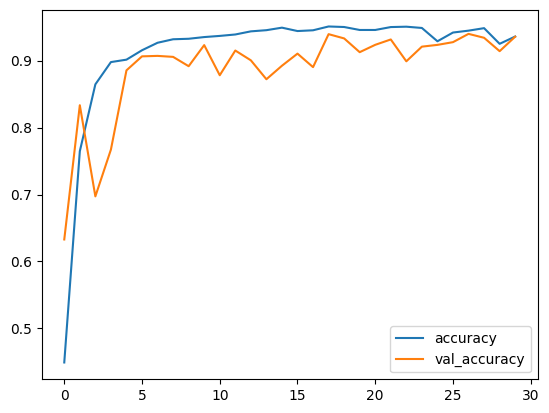

In [30]:
result_6 = pd.DataFrame(model_6.history.history)
result_6[['accuracy','val_accuracy']].plot()

In [31]:
model_7 = Sequential()

x = 64
# first hidden layer
model_7.add(Dense(units = x,activation='relu',input_shape=(784,)))

# second hidden layer
model_7.add(Dense(units = x,activation='relu',))

# third hidden layer
model_7.add(Dense(units = x,activation='relu',))

# fourth hidden layer
model_7.add(Dense(units = x,activation='relu',))
model_7.add(Dropout(0.2))
# Fifth hidden layer
model_7.add(Dense(units = x,activation='relu',))

# sixth hidden layer
model_7.add(Dense(units = x,activation='relu',))
model_7.add(Dropout(0.2))
# seventh hidden layer
model_7.add(Dense(units = x,activation='relu',))

# eighth layer
model_7.add(Dense(units = x,activation='relu',))
model_7.add(Dropout(0.2))
# nineth hidden layer
model_7.add(Dense(units = x,activation='relu',))

# tenth hidden layer 
model_7.add(Dense(units = x,activation='relu',))

# 11th hidden layer
model_7.add(Dense(units = x,activation='relu',))

# 12th hidden layer
model_7.add(Dense(units = x,activation='relu',))

# 13th hidden layer
model_7.add(Dense(units = x,activation='relu',))
# 14th hidden layer
model_7.add(Dense(units = x,activation='relu',))

# 15th hidden layer
model_7.add(Dense(units = x,activation = 'relu'))

# 16th hidden layer
model_7.add(Dense(units = x,activation = 'relu'))

# output layer
model_7.add(Dense(10,activation = 'softmax'))

model_7.compile(loss = 'categorical_crossentropy',metrics = 'accuracy',optimizer = 'adam')

# Fitting the model, training with epochs = 50
model_7.fit(X_train,y_train,epochs = 30,validation_data=(X_test,y_test))


Epoch 1/30
1466/1466 [==============================] - 11s 6ms/step - loss: 0.7492 - accuracy: 0.7526 - val_loss: 0.3445 - val_accuracy: 0.9188
Epoch 2/30
1466/1466 [==============================] - 8s 5ms/step - loss: 0.3010 - accuracy: 0.9252 - val_loss: 0.2699 - val_accuracy: 0.9355
Epoch 3/30
1466/1466 [==============================] - 8s 5ms/step - loss: 0.2362 - accuracy: 0.9428 - val_loss: 0.2362 - val_accuracy: 0.9422
Epoch 4/30
1466/1466 [==============================] - 7s 5ms/step - loss: 0.2058 - accuracy: 0.9502 - val_loss: 0.2265 - val_accuracy: 0.9439
Epoch 5/30
1466/1466 [==============================] - 7s 5ms/step - loss: 0.1835 - accuracy: 0.9556 - val_loss: 0.2159 - val_accuracy: 0.9477
Epoch 6/30
1466/1466 [==============================] - 7s 5ms/step - loss: 0.1725 - accuracy: 0.9592 - val_loss: 0.1995 - val_accuracy: 0.9523
Epoch 7/30
1466/1466 [==============================] - 8s 5ms/step - loss: 0.1550 - accuracy: 0.9629 - val_loss: 0.1975 - val_accuracy

<Axes: >

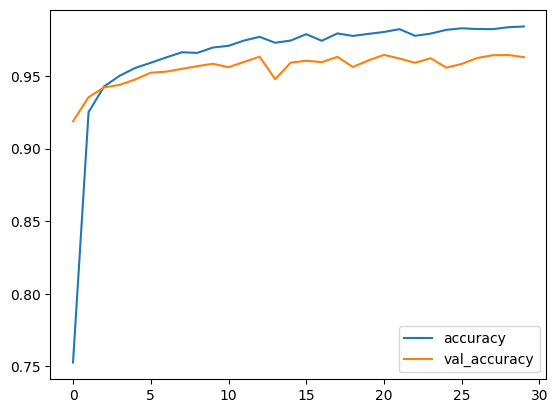

In [32]:
result_7 = pd.DataFrame(model_7.history.history)
result_7[['accuracy','val_accuracy']].plot()

<br>

<br>

Now we are creating a function to create a model and use **different hyperparameters and check chich parameters will be good for generalizing the model**

<br>

In [33]:
# creating a function with parameters as neuron-> number of neurons
  # dropout rate 
def create_model(neurons,
                 dropout_rate,
                 ):
    
 # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(784,), activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))   
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
     # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Calling the model creation funcion
model = KerasClassifier(model=create_model)

# define the grid search parameters
batch_size = [64,128]
epochs = [10,20]
optimizer = ['SGD', 'RMSprop', 'Adam']
dropout_rate = [ 0.2, 0.3]
neurons = [16,32,64]

# param_grid = dict(model__neurons=neurons)

# model = KerasClassifier(model=create_model, verbose=3)
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                    model__neurons=neurons,
                  model__dropout_rate=dropout_rate
                  )

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,verbose=3,refit=True)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Epoch 1/10
489/489 [==============================] - 4s 3ms/step - loss: 1.8489 - accuracy: 0.2510
Epoch 2/10
489/489 [==============================] - 2s 4ms/step - loss: 1.2369 - accuracy: 0.5430
Epoch 3/10
489/489 [==============================] - 2s 3ms/step - loss: 0.9895 - accuracy: 0.6391
Epoch 4/10
489/489 [==============================] - 2s 3ms/step - loss: 0.8366 - accuracy: 0.7104
Epoch 5/10
489/489 [==============================] - 1s 3ms/step - loss: 0.7417 - accuracy: 0.7482
Epoch 6/10
489/489 [==============================] - 1s 3ms/step - loss: 0.6397 - accuracy: 0.7835
Epoch 7/10
489/489 [==============================] - 1s 3ms/step - loss: 0.5750 - accuracy: 0.8101
Epoch 8/10
489/489 [==============================] - 1s 3ms/step - loss: 0.5356 - accuracy: 0.8328
Epoch 9/10
489/489 [==============================] - 1s 3ms/step - loss: 0.4973 - accuracy: 0.8508
Epoch 10/10
245/245 [==================

Now ,printing the **results of GridsearchCV with different hyperparameters and displaying the Best parameters with mean testscore**

In [34]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print()
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.957591 using {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__neurons': 64}

0.672747 (0.115159) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__neurons': 16}
0.937697 (0.002977) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__neurons': 32}
0.949403 (0.006586) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__neurons': 64}
0.268551 (0.051810) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__neurons': 16}
0.692811 (0.188260) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__neurons': 32}
0.945693 (0.002618) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__neurons': 64}
0.748017 (0.090116) with: {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__neurons': 16}
0.938699 (0.007470) with: {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__neurons': 32}
0.957591 (0.003438) wit

<br>

##### 2. Explain your findings and report best hyperparameter values.

**The Problem Statement** -In the field of Machine Learning, the MNIST dataset is one of the most popular datasets for image classification. It is a dataset of handwritten digits, consisting of 70,000 images of size 28x28 pixels. The dataset is split into a training set of 60,000 images and a test set of 10,000 images.<br> Each image is a crude 28 x 28 (784 pixels) handwritten digit from "0" to "9." Each pixel value is a grayscale integer between 0 and 255.<br>This problem is mainly responsible for creating a model that helps identify the different hand written digits so that a machine will learn the patterns of different hand written style digits and ultimately helps to classify the digits when any machine having this trained classifier will come across any digit ranging from 0,1,2,3.....till 9

To solve this problem , we are using **MLP -Multi-layer Perceptron in TensorFlow**<br>Multi-Layer perceptron defines the most complex architecture of artificial neural networks. It is substantially formed from multiple layers of the perceptron. TensorFlow is a very popular deep learning framework released by, and this notebook will guide to build a neural network with this library

A Deep Learning Model-MLP usually has variable parameters that must be set before training called Hyperparameters. These values affect the results of the model effectively. So the optimal values for these parameters to obtain the best results should be found. Finding the most optimal combination is called Hyperparameter Tuning.

Here, We have created models with different architectures and tuned different hyperparamters

Hyperparameter tuning is the process of finding the optimal values for the hyperparameters of a neural network. Hyperparameters affect the model's performance and are set before training. Hyperparameter tuning can improve a neural network's accuracy and efficiency and is essential for getting good results.

Several approaches to hyperparameter tuning include manual tuning and grid search, have been done using **KerasClassifier** is just a wrapper over the actual Model in keras so that the actual methods of the keras api can be routed to the methods used in scikit, so it can be used in conjunction with scikit utilities

Hyperparameter tuning involves testing various combinations of hyperparameter values and returning the combination that produces the best performance.

Hyperparameter tuning uses algorithms and tools and searches for the values of **Epochs, Batch size, learning rate, etc. to find the best value combinations.**

<br>

For checking the performance ,<br>**mean_test_score is considered** <br> mean_test_score is the average of the test scores of the predictive models trained and tested on each CV split.

GridSearchCV takes all the parameter lists of parameters you pass and tries all possible combinations to find the best parameters.

To evaluate which are the best parameters, it calculates a k-fold cross-validation for each parameters combination. With k-fold cross-validation, the training set is divided into Training set and Validation set (which is a test set). If you choose, for example, cv=3 the dataset is divided into 3 non-overlapping folds, and each fold is used as a validation set, while all the other are used as training set. Hence, GridSearchCV, in the example, calculates the average validation score (which can be accuracy or something else) for each of the 3 folds, and does so for each parameters combination. Then, at the end of GridsearchCV there will be an average validation score for each parameter combination, and the one with the highest average validation score is returned. So, the average validation score, associated to the best parameters, is stored in the grid.best_score_ variable.

On the other hand, the grid.score(X_valid, y_valid) method gives the score on the given data, if the estimator has been refitted (refit=True).This means that it is not the average accuracy of the 3 folds, but is taken the model with the best parameters and is trained using the training set. 

<br>

Following Hyperparameters are considered  in above model training to give robust and generalised results

**Batch Size**
The batch size can impact the generalization performance of the model. A larger batch size may result in better generalization, allowing the model to average over more examples and reducing the model's weight variance. However, a very large batch size can also cause the model to to converge to a suboptimal solution, as it may result in a slower learning rate and a less noisy gradient.

A larger batch size may allow the model to perform more efficiently using the available hardware, as it can better use vectorized operations and parallelization. However, a large batch size can also cause memory issues, as it may require more memory to store the gradients and intermediate activations.

**The Number of Neurons per Hidden Layer**<br> behaves similarly to the number of layers. The number of Neurons increases with the complexity of the data. The number of Neurons in a Neural Network can vary with the chosen architecture. Increasing Neurons helps fit data better. While reducing layers can help reduce bias and faster training. Generally, the number of Neurons is increased until there is no improvement in performance. It is important to note that this parameter is also prone to overfitting.

**The number of epochs**<br> is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.

**Dropout**<br> is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

Below are the details of different models run with **different hyperparameters values that are manually set** and reported the results and after that reported the **results of hyperparameters that were trained using GridsearchCV**

The Neural network was run using 16 hidden layers wth different architectures and reported different metric values based on its architecture

model_1 was run with :-<br>neurons in each layer->2<br>loss_function->tanh<br>optimizer->rmsprop<br>epochs->10

In [36]:
result_1.sort_values(by = 'val_accuracy',ascending=False).head(1)

,loss,accuracy,val_loss,val_accuracy
7,1.601786,0.300512,1.606499,0.307186


<Axes: >

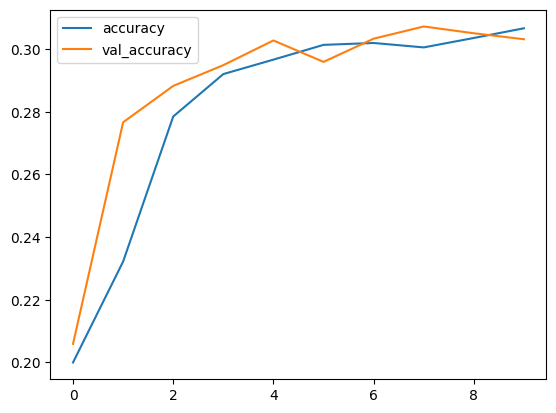

In [37]:
result_1[['accuracy','val_accuracy']].plot()

<br>model_2 was run with :-<br>neurons in each layer->16<br>loss_function->tanh<br>optimizer->rmsprop<br>epochs->20

In [38]:
result_2.sort_values(by = 'val_accuracy',ascending=False).head(1)

,loss,accuracy,val_loss,val_accuracy
18,0.181467,0.952601,0.295097,0.92619


<Axes: >

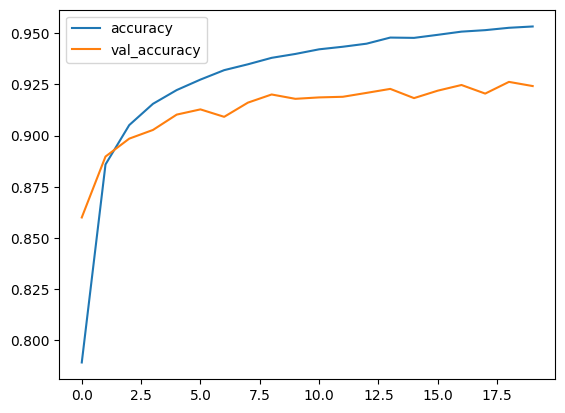

In [39]:
result_2[['accuracy','val_accuracy']].plot()

<br><br>model_3 was run with :-<br>neurons in each layer->16<br>loss_function->relu<br>optimizer->rmsprop<br>epochs->20

In [40]:
result_3.sort_values(by = 'val_accuracy',ascending=False).head(1)

,loss,accuracy,val_loss,val_accuracy
17,0.211839,0.947591,0.300748,0.932294


<Axes: >

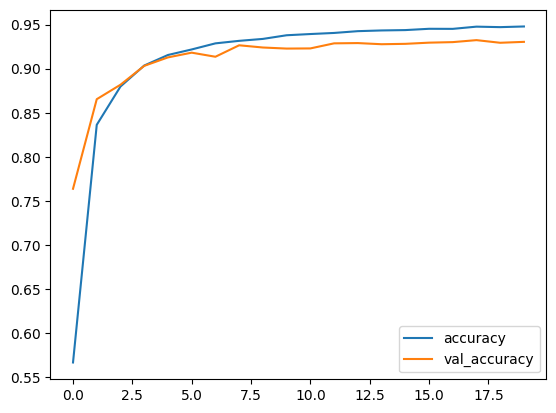

In [41]:
result_3[['accuracy','val_accuracy']].plot()

<br><br>model_4 was run with :-<br>neurons in each layer->16<br>loss_function->relu<br>optimizer->adam<br>epochs->30

In [42]:
result_4.sort_values(by = 'val_accuracy',ascending=False).head(1)

,loss,accuracy,val_loss,val_accuracy
28,0.167914,0.955373,0.283082,0.93658


<Axes: >

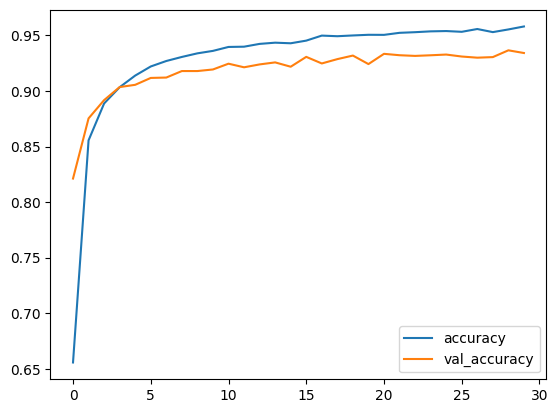

In [43]:
result_4[['accuracy','val_accuracy']].plot()

<br><br>model_5 was run with :-<br>neurons in each layer->32<br>loss_function->relu<br>optimizer->adam<br>epochs->30

In [44]:
result_5.sort_values(by = 'val_accuracy',ascending=False).head(1)

,loss,accuracy,val_loss,val_accuracy
27,0.055837,0.985949,0.249778,0.959913


<Axes: >

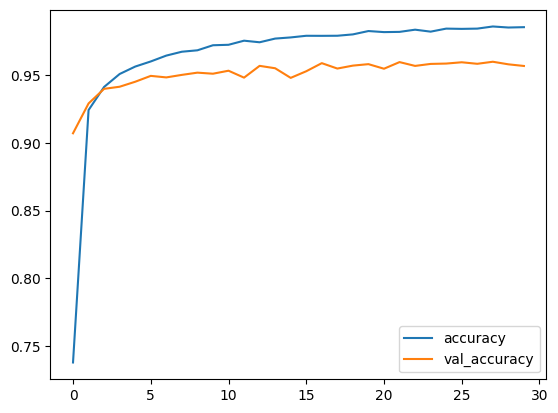

In [45]:
result_5[['accuracy','val_accuracy']].plot()

<br><br>model_6 was run with :-<br>neurons in each layer->32<br>loss_function->relu<br>optimizer->adam<br>epochs->30<br>Dropout layer->5

In [46]:
result_6.sort_values(by = 'val_accuracy',ascending=False).head(1)

,loss,accuracy,val_loss,val_accuracy
26,0.235247,0.944861,0.28312,0.940043


<Axes: >

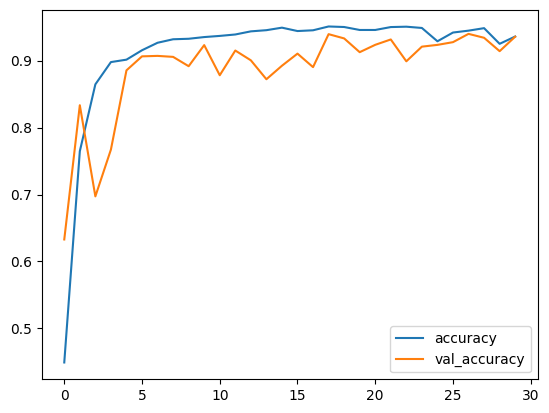

In [47]:
result_6[['accuracy','val_accuracy']].plot()

<br><br>model_7 was run with :-<br>neurons in each layer->64<br>loss_function->relu<br>optimizer->adam<br>epochs->30<br>Dropout layer ->3

In [48]:
result_7.sort_values(by = 'val_accuracy',ascending=False).head(1)

,loss,accuracy,val_loss,val_accuracy
20,0.085123,0.980384,0.188522,0.964632


<Axes: >

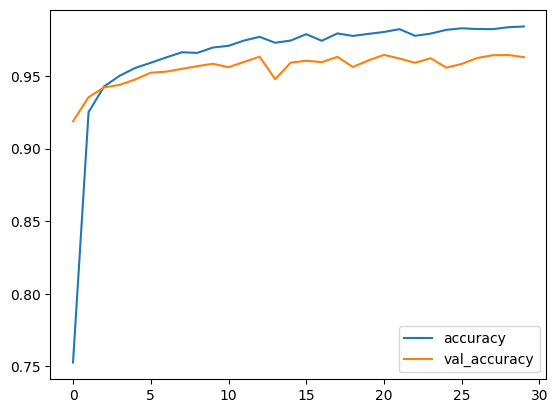

In [49]:
result_7[['accuracy','val_accuracy']].plot()

<br><br><br>

<br>From Above comparison,model_5 with below architecture reported best below performance among other model architectures<br> :-<br>neurons in each layer->32<br>loss_function->relu<br>optimizer->adam<br>epochs->30

In [50]:
result_5.sort_values(by = 'val_accuracy',ascending=False).head(1)

,loss,accuracy,val_loss,val_accuracy
27,0.055837,0.985949,0.249778,0.959913


<br>

Now reporting the results pf hyperparameters  that were trained using GridSearchCV

In [51]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print()
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.957591 using {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__neurons': 64}

0.672747 (0.115159) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__neurons': 16}
0.937697 (0.002977) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__neurons': 32}
0.949403 (0.006586) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__neurons': 64}
0.268551 (0.051810) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__neurons': 16}
0.692811 (0.188260) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__neurons': 32}
0.945693 (0.002618) with: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__neurons': 64}
0.748017 (0.090116) with: {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__neurons': 16}
0.938699 (0.007470) with: {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__neurons': 32}
0.957591 (0.003438) wit

##### References

https://scikit-learn.org/stable/modules/grid_search.html<br>http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.68420&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false<br>https://www.analyticsvidhya.com/blog/2022/01/introduction-to-neural-networks/<br>https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/<br>https://stackoverflow.com/questions/69040683/what-is-the-difference-between-grid-scorex-valid-y-valid-and-grid-best-score<br>https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/<br>https://www.scaler.com/topics/deep-learning/neural-network-hyperparameters-tuning/